<a href="https://colab.research.google.com/github/ranshull/Analyzing-Startup-Ecosystem-and-Funding-Trends-in-India/blob/main/notebooks/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descriptive Statistics:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/cleaned2_Startup_funding.csv')
df

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020,High,1
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,25000000.0,Late Stage,2015,High,1
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,1529113.0,No Remark,2015,Medium,1
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,25795550.0,Series D,2015,High,2
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,10000000.0,Series B,2015,Medium,1




---


Mean, median, standard deviation of funding amount


---



In [4]:
mean_amt = df['Amount_USD'].mean()
median_amt = df['Amount_USD'].median()
std_amt = df['Amount_USD'].std()

print(f"Mean: ${mean_amt:,.2f}")
print(f"Median: ${median_amt:,.2f}")
print(f"Standard Deviation: ${std_amt:,.2f}")


Mean: $15,738,873.52
Median: $1,529,113.00
Standard Deviation: $103,159,141.72


 - Highly Right-Skewed Distribution : Mean >> Median again

 - Insight: Most startups get modest funding, but a few unicorns like BYJU’S or Zomato raise very high amounts, distorting the average.

In [5]:
#varience, std and mad comparison

num_df = df.select_dtypes(include='number')

# Variance
variance = num_df.var()
print("Variance:\n", variance)

# Standard Deviation
std_dev = num_df.std()
print("\nStandard Deviation:\n", std_dev)

# MAD
mad= np.mean(np.abs(num_df-np.mean(num_df)))
print(f'mean absolute deviation :{round(mad,2)}')


Variance:
 Amount_USD        1.064181e+16
Year              1.225342e+00
investor_count    2.023644e+00
dtype: float64

Standard Deviation:
 Amount_USD        1.031591e+08
Year              1.106952e+00
investor_count    1.422548e+00
dtype: float64
mean absolute deviation :8773869.2



  - STD (Amount_USD) = 103 million
  - MAD (Amount_USD) = 8.77 million

This big gap shows:
 - A few startups raised huge amounts (very far from the mean),
 - While most are closer to the average


---





---


Create summary tables: Avg. funding per industry per year


---



In [6]:
summary_table = df.groupby(['Industry_Vertical', 'Year'])['Amount_USD'].mean().reset_index()
summary_table.rename(columns={'Amount_USD': 'Avg_Funding'}, inplace=True)
summary_table.sort_values(by='Avg_Funding', ascending=False, inplace=True)

tt= summary_table.head(5)
tt

,Industry_Vertical,Year,Avg_Funding
5,B2B,2019,5.850000e+08
3,Automation,2018,3.000000e+08
24,EdTech,2020,2.000000e+08
47,Hospitality,2020,1.500000e+08
14,ECommerce,2015,1.166295e+08


/tmp/ipython-input-1548797527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tt, x='Avg_Funding', y='Industry_Vertical', palette='viridis')


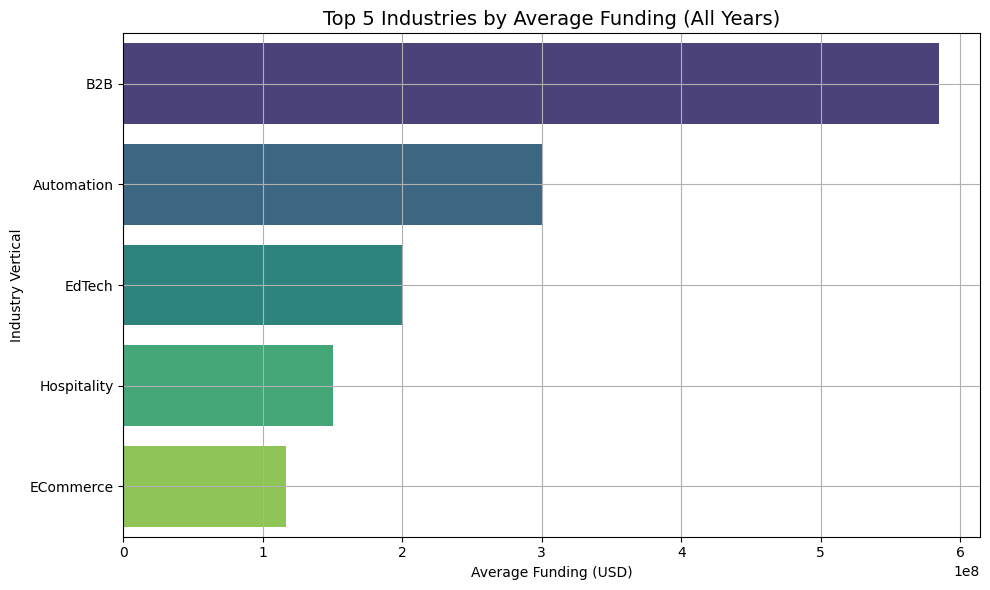

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tt, x='Avg_Funding', y='Industry_Vertical', palette='viridis')
plt.title('Top 5 Industries by Average Funding (All Years)', fontsize=14)
plt.xlabel('Average Funding (USD)')
plt.ylabel('Industry Vertical')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Key Industry-Year Funding Insights
-  **B2B (2019)**:  Avg. funding of $58.5M — highest in the dataset, likely due to enterprise SaaS, logistics, and fintech infra boom post-2018.

-  **Automation (2018)**: $ 30 M avg. funding indicates rising interest in robotics & AI automationh before COVID-19.

-  **EdTech (2020)**: $ 20M avg. reflects pandemic-driven boom in e-learning; likely led by BYJU’S and similar platforms.

- **Hospitality (2020)**:  $ 15M avg. despite COVID; possibly due to pre-lockdown deals or rise in home-stay tech.

- **ECommerce (2015)**: $ 11.6M avg. funding points to early growth phase, with major backing for players like Flipkart, Myntra.( In May 2014, Myntra.com was acquired by Flipkart.)




---


Calculate coefficient of variation by city and industry
 - CV tells you how "messy" or "spread out" your data is compared to the average.


---



In [8]:
cv_by_city = df.groupby('City_Location')['Amount_USD'].agg(['mean', 'std'])
cv_by_city['CV'] = cv_by_city['std'] / cv_by_city['mean']
cv_by_city = cv_by_city.sort_values('CV')
cv_by_city.head()

,mean,std,CV
City_Location,,,
Agra,1.529113e+06,0.000000e+00,0.000000
Bhubaneswar,2.439778e+07,1.976752e+06,0.081022
Gwalior,4.500000e+05,7.071068e+04,0.157135
Coimbatore,1.097343e+06,7.166764e+05,0.653102
Nagpur,1.067075e+06,8.002727e+05,0.749968


In [9]:
cv_by_industry = df.groupby('Industry_Vertical')['Amount_USD'].agg(['mean', 'std'])
cv_by_industry['CV'] = cv_by_industry['std'] / cv_by_industry['mean']
cv_by_industry = cv_by_industry.sort_values('CV')
cv_by_industry.head()

,mean,std,CV
Industry_Vertical,,,
Marketplace,1.529113e+06,0.000000e+00,0.000000
Beauty,1.397186e+06,4.499930e+05,0.322071
Hospitality,8.875000e+07,6.060459e+07,0.682869
Media,1.973306e+06,1.620375e+06,0.821147
Home Decor,2.404764e+07,2.043209e+07,0.849651




---


 Most Stable vs. Most Volatile Cities/Industries


---



In [10]:
print("🔒 Most Stable Cities:")
print(cv_by_city.head(20)[['CV']])

print("\n🚨 Most Volatile Cities:")
print(cv_by_city.tail(20)[['CV']])

🔒 Most Stable Cities:
                     CV
City_Location          
Agra           0.000000
Bhubaneswar    0.081022
Gwalior        0.157135
Coimbatore     0.653102
Nagpur         0.749968
Vadodara       0.845620
Kolkata        0.998770
Kanpur         1.003731
Chandigarh     1.083649
Udupi          1.094534
Bhopal         1.160185
Kochi          1.255932
Siliguri       1.255932
Faridabad      1.294656
Surat          1.299672
Udaipur        1.360432
Trivandrum     1.403291
Chennai        1.502558
Ahmedabad      1.714187
Pune           1.848718

🚨 Most Volatile Cities:
                     CV
City_Location          
Goa            2.335436
Gurgaon        2.358188
Jaipur         2.484867
Mumbai         3.002712
New Delhi      3.955996
Noida          5.802924
Bangalore      7.245499
Amritsar            NaN
Belgaum             NaN
Gaya                NaN
Hubli               NaN
Jodhpur             NaN
Karur               NaN
Kozhikode           NaN
Lucknow             NaN
Panaji           

 1. Bangalore Is the Most Volatile City
   - CV of 7.24 shows extreme funding variability — from tiny seed rounds to massive unicorn-level deals.
   - Indicates a hyper-competitive and diverse funding ecosystem.

 2. Agra and Bhubaneswar Are the Most Stable
   -CVs near 0 mean startups received very similar funding amounts.
   - Reflects uniform investor behavior or few startups with consistent backing


---



REASON FOR NAN:

In [11]:
nan_cv_groups = cv_by_city[cv_by_city['CV'].isna()]
print(nan_cv_groups)

                      mean  std  CV
City_Location                      
Amritsar          300000.0  NaN NaN
Belgaum           500000.0  NaN NaN
Gaya             6000000.0  NaN NaN
Hubli            1529113.0  NaN NaN
Jodhpur           160000.0  NaN NaN
Karur            1529113.0  NaN NaN
Kozhikode       25795550.0  NaN NaN
Lucknow          1000000.0  NaN NaN
Panaji            825000.0  NaN NaN
Rourkela         2500000.0  NaN NaN
Srinagar         1529113.0  NaN NaN
Tulangan       200000000.0  NaN NaN
Varanasi           52000.0  NaN NaN


In [12]:
city_loc_count=df['City_Location'].value_counts()
print(city_loc_count)

City_Location
Bangalore      854
Mumbai         574
New Delhi      464
Gurgaon        338
Pune           112
Hyderabad      101
Chennai         99
Noida           93
Unknown         51
Ahmedabad       41
Jaipur          30
Kolkata         22
Indore          13
Chandigarh      11
Goa             11
Vadodara        10
Coimbatore       5
Kanpur           4
Faridabad        3
Bhopal           3
Nagpur           3
Agra             2
Kochi            2
Udupi            2
Surat            2
Bhubaneswar      2
Udaipur          2
Siliguri         2
Gwalior          2
Trivandrum       2
Tulangan         1
Srinagar         1
Rourkela         1
Amritsar         1
Karur            1
Panaji           1
Gaya             1
Kozhikode        1
Hubli            1
Lucknow          1
Varanasi         1
Jodhpur          1
Belgaum          1
Name: count, dtype: int64


---- INSIGHTS ----
 - Top cities like Bangalore and Mumbai receive the majority of startup funding.
 - Funding variation is low in stable sectors like Marketplace and cities like Agra.
 - Funding data is skewed with many outliers, requiring log transformation.
 -Several smaller cities have only one startup, showing weak ecosystem presence.

In [13]:
print("\n🔒 Most Stable Industries:")
print(cv_by_industry.head(3)[['CV']])

print("\n🚨 Most Volatile Industries:")
print(cv_by_industry.tail(3)[['CV']])



🔒 Most Stable Industries:
                         CV
Industry_Vertical          
Marketplace        0.000000
Beauty             0.322071
Hospitality        0.682869

🚨 Most Volatile Industries:
                   CV
Industry_Vertical    
Food & Beverage   NaN
Gaming            NaN
Retail            NaN


In [14]:
nan_cv_groups_ind = cv_by_industry[cv_by_industry['CV'].isna()]
print(nan_cv_groups_ind)

                          mean  std  CV
Industry_Vertical                      
Automation         300000000.0  NaN NaN
Food & Beverage     30000000.0  NaN NaN
Gaming               1300000.0  NaN NaN
Retail               1600000.0  NaN NaN


In [15]:
print(df['Industry_Vertical'].value_counts())


Industry_Vertical
Technology                 1356
Consumer Internet           944
ECommerce                   118
Healthcare                   84
FinTech                      83
FoodTech                     75
EdTech                       64
Logistics                    30
Fashion                      23
Real Estate                  11
Transport                    10
Beauty                        9
Analytics                     8
Services                      7
Auto                          7
Others                        6
Marketplace                   5
Consumer Goods                5
SaaS                          5
Home Decor                    4
Hospitality                   4
Media                         4
B2B                           3
CleanTech                     2
Artificial Intelligence       2
Retail                        1
Gaming                        1
Automation                    1
Food & Beverage               1
Name: count, dtype: int64


---- INSIGHTS ----
 - Tech and Consumer Internet dominate both your data and India’s real startup ecosystem.
 - Sectors like FinTech, EdTech, and Healthcare are strongly represented and reflect real growth.




---
Calculate IQR and detect funding outliers

---



In [16]:
Q1 = df['Amount_USD'].quantile(0.25)
Q3 = df['Amount_USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount_USD'] < lower_bound) | (df['Amount_USD'] > upper_bound)]

print(f"IQR: ${IQR:,.2f}")
print(f"Lower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")


IQR: $9,000,000.00
Lower Bound: $-12,500,000.00
Upper Bound: $23,500,000.00
Number of Outliers: 501


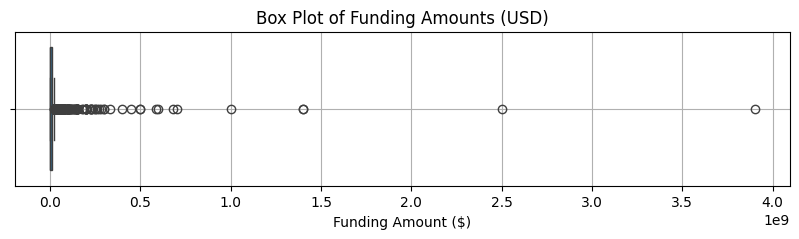

In [17]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Amount_USD'])
plt.title('Box Plot of Funding Amounts (USD)')
plt.xlabel('Funding Amount ($)')
plt.grid(True)
plt.show()


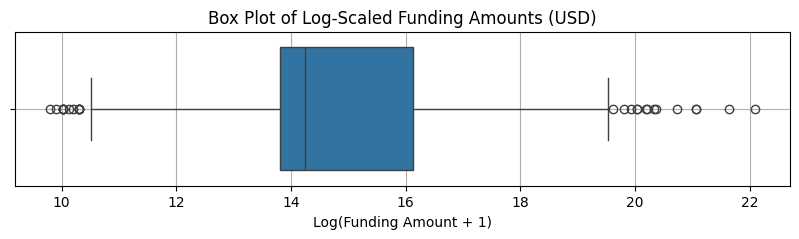

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=np.log1p(df['Amount_USD']))
plt.title('Box Plot of Log-Scaled Funding Amounts (USD)')
plt.xlabel('Log(Funding Amount + 1)')
plt.grid(True)
plt.show()

# Compresses large values
# Brings values onto a more normal scale
# Helps with box plots, regression, and clustering


- The left edge of the box (≈ 14) → Q1 ≈ $1.2M

- The right edge of the box (≈ 16) → Q3 ≈ $8.9M

- So the middle 50% of startups got funding between : approx dollar ~1.2M and ~8.9M




---

Determine top 3 sectors that received highest median investment post-2018

---



In [19]:
df_post2018 = df[df['Year'] > 2018]

median_by_sector = df_post2018.groupby('Industry_Vertical')['Amount_USD'].median().sort_values(ascending=False)
top_3_sectors = median_by_sector.head(3)

print("🏆 Top 3 Sectors (Median Funding Post-2018):")
top_3_sectors


🏆 Top 3 Sectors (Median Funding Post-2018):


,Amount_USD
Industry_Vertical,
B2B,585000000.0
Hospitality,150000000.0
Consumer Goods,73473550.0




---


- Top Cities for Funding

 - Bangalore

 - Mumbai

 - Delhi NCR


- Funding Stages

 - Most deals are seed or early-stage, showing investor interest in fast-growing startups.



---



----Business Insights----

- Important Sectors
 - B2B leads in total funding, showing strong investor interest in business-focused solutions.
 - Automation and EdTech received large funding amounts, indicating demand for innovation and digital transformation.

- Location Matters
 - Cities like Bangalore, Mumbai, and Delhi NCR offer better access to investors, talent, and startup networks — boosting chances of getting funded and growing quickly.